## Forecasting Airline Passengers

### Contents

#### <ul><li>Objective</li>
#### <li>Importing Libraries and Loading Dataset</li> 
#### <li>Plotting Data</li>    
#### <li>Rolling Statistics</li>
#### <li>Dickey-Fuller Test</li>
#### <li>Moving Average</li>
#### <li>Diff between log and moving average model</li>
#### <li>Exponential Decay Weighted Average</li>
#### <li>Diff between log and weighted avergae model</li>
#### <li>Diff between log model and log model using shift</li>
#### <li>Trend, Seasonality and Residuals</li>
#### <li>ACF & PACF Plots</li>
#### <li>ARIMA Model</li>
#### <li>Improved ARIMA Model</li>
#### <li>Predictions for 10 years</li>
#### <li>Applying exponential function to convert the data into original format</li></ul>

### Objective
#### To build a demand forecasting model which will predict number of passengers travelling through airplane on a monthly basis.

### Importing Libraries and Loading Dataset

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
# Importing dataset
df = pd.read_csv(r"C:\Users\Ojas\Desktop\Kaggle\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month']= pd.to_datetime(df['Month'],infer_datetime_format=True)
index_df= df.set_index(['Month'])
index_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Plotting data

C:\Users\Ojas\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


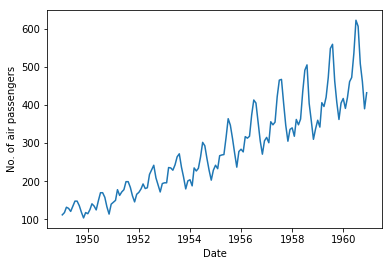

In [5]:
# Plotting data
plt.plot(index_df)
plt.xlabel('Date')
plt.ylabel('No. of air passengers')
plt.show()

### Rolling Statistics

In [6]:
# Determining rolling statistics
mean_roll = index_df.rolling(window=12).mean()
std_roll = index_df.rolling(window=12).std()
print(mean_roll, std_roll)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

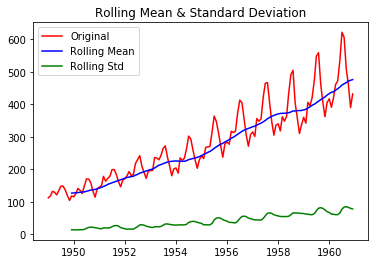

In [7]:
# Plot rolling statistics
org = plt.plot(index_df, color = 'red', label = 'Original')
mean= plt.plot(mean_roll, color='blue', label= 'Rolling Mean')
std= plt.plot(std_roll, color='green', label= 'Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### Dickey-Fuller Test

In [8]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test")
df_test = adfuller(index_df['#Passengers'], autolag='AIC')

df_output = pd.Series(df_test[0:4], index=["Test-Statistic","p-value", "#Lags used", "No. of observations used"])
for key,value in df_test[4].items():
    df_output["Critical Value (%s)"%key]=value
print(df_output)

Results of Dickey-Fuller Test
Test-Statistic                0.815369
p-value                       0.991880
#Lags used                   13.000000
No. of observations used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


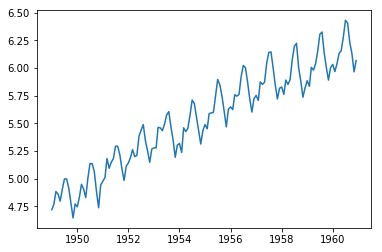

In [9]:
# Estimating Trend
index_df_log = np.log(index_df)
plt.plot(index_df_log)

### Moving Average

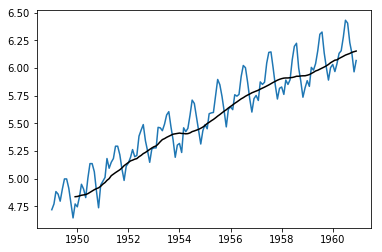

In [10]:
# Moving Average
mov_avg= index_df_log.rolling(window=12).mean()
mov_std= index_df_log.rolling(window=12).std()
plt.plot(index_df_log)
plt.plot(mov_avg, color='black')

### Diff between log and moving average model

In [11]:
diff_log_mov= index_df_log - mov_avg
diff_log_mov.head()

#Eliminate NaN values
diff_log_mov.dropna(inplace=True)
diff_log_mov.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [12]:
from statsmodels.tsa.stattools import adfuller
def stationarity(timeseries):
    
    #Determining Rolling Statistics
    mov_avg = timeseries.rolling(window=12).mean()
    mov_std = timeseries.rolling(window=12).std()
    
    # Plot rolling statistics
    org = plt.plot(timeseries, color = 'red', label = 'Original')
    mean= plt.plot(mov_avg, color='blue', label= 'Rolling Mean')
    std= plt.plot(mov_std, color='green', label= 'Rolling Std')
    plt.legend(loc='best')
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()
    
    #Perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test")
    df_test = adfuller(timeseries['#Passengers'], autolag='AIC')

    df_output = pd.Series(df_test[0:4], index=["Test-Statistic","p-value", "#Lags used", "No. of observations used"])
    for key,value in df_test[4].items():
        df_output["Critical Value (%s)"%key]=value
    print(df_output)
    

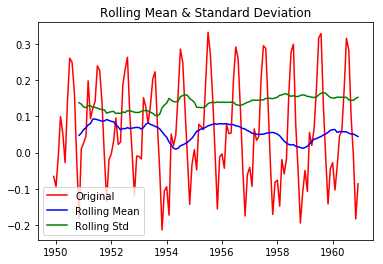

Results of Dickey-Fuller Test
Test-Statistic               -3.162908
p-value                       0.022235
#Lags used                   13.000000
No. of observations used    119.000000
Critical Value (1%)          -3.486535
Critical Value (5%)          -2.886151
Critical Value (10%)         -2.579896
dtype: float64


In [13]:
stationarity(diff_log_mov)

### Exponential Decay Weighted Average

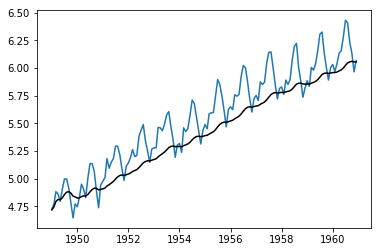

In [14]:
#Exponential Decay Weighted Average
exp_decay_wavg= index_df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(index_df_log)
plt.plot(exp_decay_wavg, color='black')

### Diff between log and weighted average model

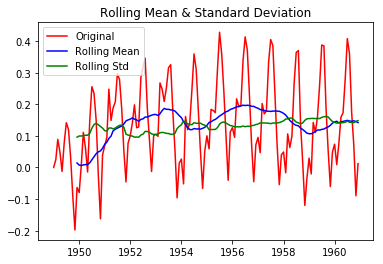

Results of Dickey-Fuller Test
Test-Statistic               -3.601262
p-value                       0.005737
#Lags used                   13.000000
No. of observations used    130.000000
Critical Value (1%)          -3.481682
Critical Value (5%)          -2.884042
Critical Value (10%)         -2.578770
dtype: float64


In [15]:
diff_log_exp= index_df_log - exp_decay_wavg
stationarity(diff_log_exp)

### Diff between log model and log model using shift

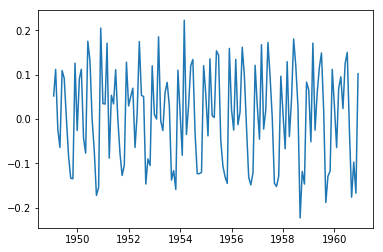

In [16]:
diff_log_shift = index_df_log - index_df_log.shift()
plt.plot(diff_log_shift)

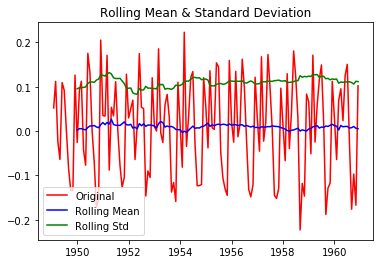

Results of Dickey-Fuller Test
Test-Statistic               -2.717131
p-value                       0.071121
#Lags used                   14.000000
No. of observations used    128.000000
Critical Value (1%)          -3.482501
Critical Value (5%)          -2.884398
Critical Value (10%)         -2.578960
dtype: float64


In [17]:
diff_log_shift.dropna(inplace=True)
stationarity(diff_log_shift)

### Trend, Seasonality & Residuals

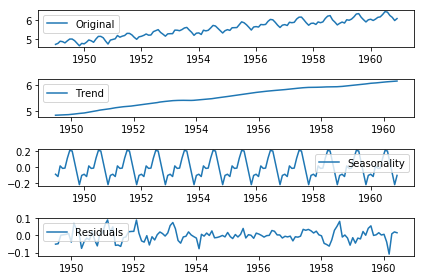

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(index_df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(index_df_log, label ='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()





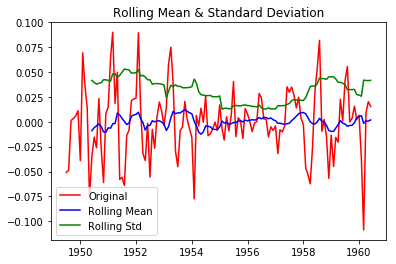

Results of Dickey-Fuller Test
Test-Statistic             -6.332387e+00
p-value                     2.885059e-08
#Lags used                  9.000000e+00
No. of observations used    1.220000e+02
Critical Value (1%)        -3.485122e+00
Critical Value (5%)        -2.885538e+00
Critical Value (10%)       -2.579569e+00
dtype: float64


In [23]:
decomp_log = residual
decomp_log.dropna(inplace=True)
stationarity(decomp_log)


###  ACF & PACF Plots

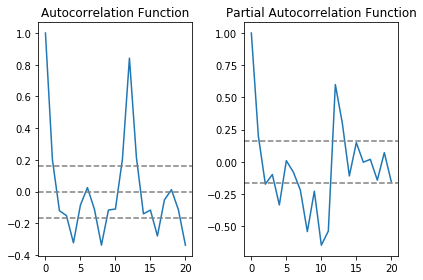

In [26]:
#ACF & PACF Plots
from statsmodels.tsa.stattools import acf, pacf

acf_lag = acf(diff_log_shift, nlags=20)
pacf_lag = pacf(diff_log_shift, nlags=20, method='ols')

# Plotting ACF
plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_log_shift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#Plotting PACF
plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=-1.96/np.sqrt(len(diff_log_shift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff_log_shift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### ARIMA Model

C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


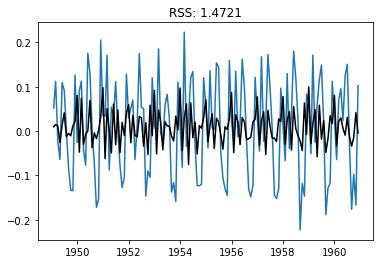

Plotting ARIMA Model 


In [40]:
from statsmodels.tsa.arima_model import ARIMA

# AR Model
ar_model = ARIMA(index_df_log, order=(0,1,2))
ar_result = ar_model.fit(disp=-1)
plt.plot(diff_log_shift)
plt.plot(ar_result.fittedvalues, color='black')
plt.title('RSS: %.4f'% sum((ar_result.fittedvalues-diff_log_shift["#Passengers"])**2))
print('Plotting ARIMA Model ')
plt.show()

C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


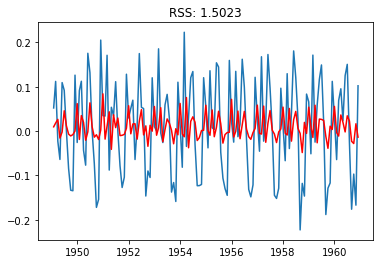

Plotting MA ARIMA Model 


In [37]:
#MA ARIMA Model
ma_model=ARIMA(index_df_log, order=(2,1,0))
ma_result= ma_model.fit(disp=-1)
plt.plot(diff_log_shift)
plt.plot(ma_result.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((ma_result.fittedvalues-diff_log_shift["#Passengers"])**2))
print('Plotting MA ARIMA Model ')
plt.show()

### Improved ARIMA Model

C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

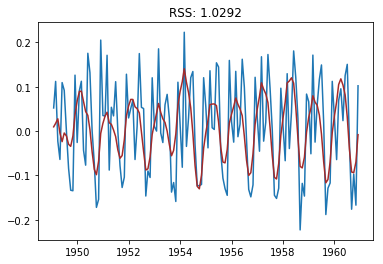

In [39]:
diff_model = ARIMA(index_df_log, order=(2,1,2))
diff_results = diff_model.fit(disp=-1)
plt.plot(diff_log_shift)
plt.plot(diff_results.fittedvalues, color='brown')
plt.title("RSS: %.4f"% sum((diff_results.fittedvalues - diff_log_shift['#Passengers'])** 2))

In [41]:
diff_pred = pd.Series(diff_results.fittedvalues, copy=True)
print(diff_pred.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [42]:
#Convert to cumulative sum
diff_pred_cumsum = diff_pred.cumsum()
print(diff_pred_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [43]:
diff_pred_log= pd.Series(index_df_log['#Passengers'].ix[0], index=index_df_log.index)
diff_pred_log= diff_pred_log.add(diff_pred_cumsum, fill_value=0)
diff_pred_log.head()

C:\Users\Ojas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

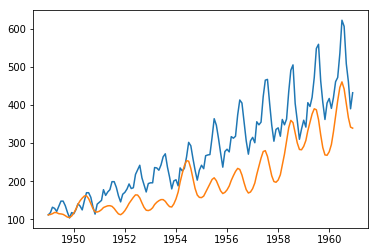

In [44]:
pred_arima = np.exp(diff_pred_log)
plt.plot(index_df)
plt.plot(pred_arima)

In [46]:
index_df_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
1949-06-01,4.905275
1949-07-01,4.997212
1949-08-01,4.997212
1949-09-01,4.912655


### Predictions for 10 years

C:\Users\Ojas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


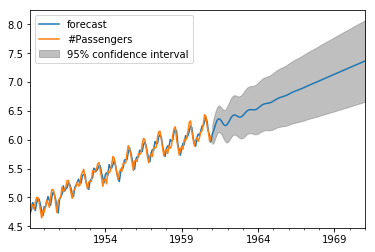

In [45]:
diff_results.plot_predict(1,264)
x=diff_results.forecast(steps=120)

In [47]:
x[1]

array([0.08384711, 0.10749462, 0.11568695, 0.11702774, 0.11703496,
       0.11744018, 0.1176225 , 0.11778713, 0.12024162, 0.12736041,
       0.13870957, 0.15118789, 0.16157809, 0.16834388, 0.17177321,
       0.17311973, 0.17358722, 0.17385449, 0.17430206, 0.1754332 ,
       0.17788136, 0.18195711, 0.18726206, 0.19283381, 0.19769232,
       0.20130625, 0.2036904 , 0.20519816, 0.20625252, 0.20720981,
       0.20836953, 0.21000309, 0.21229726, 0.21524461, 0.21860161,
       0.22198238, 0.22503045, 0.22755274, 0.22954785, 0.23114776,
       0.23253803, 0.23390511, 0.23541287, 0.23718288, 0.23926514,
       0.24161514, 0.24410347, 0.24656332, 0.24885231, 0.25089603,
       0.25269706, 0.25431601, 0.25584284, 0.257372  , 0.25898361,
       0.26072821, 0.26261519, 0.2646106 , 0.26664869, 0.26865451,
       0.27056818, 0.27236066, 0.2740367 , 0.27562742, 0.27717797,
       0.27873494, 0.28033558, 0.28199985, 0.28372649, 0.28549476,
       0.28727176, 0.28902311, 0.29072302, 0.29236047, 0.29394

In [48]:
len(x[1])

120

### Applying exponential function to convert the data into original format

In [49]:
np.exp(x[1])

array([1.08746262, 1.11348487, 1.12264437, 1.12415062, 1.12415873,
       1.12461435, 1.12481941, 1.12500461, 1.12776931, 1.1358263 ,
       1.14879041, 1.1632152 , 1.17536424, 1.18334347, 1.18740851,
       1.18900845, 1.18956444, 1.18988241, 1.19041509, 1.19176238,
       1.19468358, 1.19956274, 1.20594327, 1.21268125, 1.2185874 ,
       1.22299926, 1.22591855, 1.22776834, 1.22906352, 1.23024066,
       1.23166823, 1.23368187, 1.2365154 , 1.24016521, 1.24433545,
       1.24854938, 1.25236085, 1.25552366, 1.25803107, 1.26004541,
       1.26179843, 1.26352459, 1.26543111, 1.26767293, 1.27031531,
       1.27330406, 1.2764764 , 1.27962021, 1.2825526 , 1.28517646,
       1.28749319, 1.28957925, 1.29154973, 1.29352623, 1.29561257,
       1.29787487, 1.30032624, 1.30292352, 1.3055817 , 1.30820309,
       1.31070896, 1.31306048, 1.31526307, 1.31735695, 1.31940116,
       1.32145703, 1.3235739 , 1.32577851, 1.32806964, 1.3304201 ,
       1.33278637, 1.33512258, 1.3373941 , 1.33958582, 1.34170